<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.739051,81.944157,81.212673,69.312064,266.382090,530.590035,-996.810996,1527.401031
1,0.0,1.0,26.553495,21.344267,30.677807,87.973565,-462.506837,-285.957704,927.984266,-1213.941971
2,0.0,2.0,21.497699,56.977055,63.067177,63.665422,4017.734128,4232.941482,-139.819197,4372.760679
3,0.0,3.0,84.272274,94.520801,20.212336,85.708701,-7008.056514,-6713.342402,-423.684432,-6289.657970
4,0.0,4.0,58.684801,56.122717,47.975276,22.141641,2786.737003,2981.661439,789.397550,2192.263889
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.904638,97.859000,98.380871,79.084571,-7341.162962,-6966.933882,-1668.099955,-5298.833927
29996,999.0,26.0,23.821095,41.545497,45.807883,95.992204,-1358.703601,-1141.536922,2341.463002,-3482.999923
29997,999.0,27.0,55.775989,72.252762,92.906359,61.342063,1.029887,293.307060,-1304.263321,1597.570381
29998,999.0,28.0,98.591615,88.860211,45.622867,70.886683,-934.585153,-620.623777,919.857395,-1540.481172


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    21.739051  81.944157  81.212673  69.312064   266.382090   
      1.0    26.553495  21.344267  30.677807  87.973565  -462.506837   
      2.0    21.497699  56.977055  63.067177  63.665422  4017.734128   
      3.0    84.272274  94.520801  20.212336  85.708701 -7008.056514   
      4.0    58.684801  56.122717  47.975276  22.141641  2786.737003   
...                ...        ...        ...        ...          ...   
999.0 25.0   88.904638  97.859000  98.380871  79.084571 -7341.162962   
      26.0   23.821095  41.545497  45.807883  95.992204 -1358.703601   
      27.0   55.775989  72.252762  92.906359  61.342063     1.029887   
      28.0   98.591615  88.860211  45.622867  70.886683  -934.585153   
      29.0   30.205715  77.616503  60.085072  22.903227   766.582720   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     530.590035  -996.810996  1527.401031  
      1.0    -285.957704   927.984266 -1213.941971  
      2.0    4232.941482  -139.819197  4372.760679  
      3.0   -6713.342402  -423.684432 -6289.657970  
      4.0    2981.661439   789.397550  2192.263889  
...                  ...          ...          ...  
999.0 25.0  -6966.933882 -1668.099955 -5298.833927  
      26.0  -1141.536922  2341.463002 -3482.999923  
      27.0    293.307060 -1304.263321  1597.570381  
      28.0   -620.623777   919.857395 -1540.481172  
      29.0    967.393237  1765.933852  -798.540615  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    21.739051  81.944157  81.212673  69.312064   266.382090   
      1.0    26.553495  21.344267  30.677807  87.973565  -462.506837   
      2.0    21.497699  56.977055  63.067177  63.665422  4017.734128   
      3.0    84.272274  94.520801  20.212336  85.708701 -7008.056514   
      4.0    58.684801  56.122717  47.975276  22.141641  2786.737003   
...                ...        ...        ...        ...          ...   
999.0 25.0   88.904638  97.859000  98.380871  79.084571 -7341.162962   
      26.0   23.821095  41.545497  45.807883  95.992204 -1358.703601   
      27.0   55.775989  72.252762  92.906359  61.342063     1.029887   
      28.0   98.591615  88.860211  45.622867  70.886683  -934.585153   
      29.0   30.205715  77.616503  60.085072  22.903227   766.582720   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     530.590035  -996.810996  1527.401031  
      1.0    -285.957704   927.984266 -1213.941971  
      2.0    4232.941482  -139.819197  4372.760679  
      3.0   -6713.342402  -423.684432 -6289.657970  
      4.0    2981.661439   789.397550  2192.263889  
...                  ...          ...          ...  
999.0 25.0  -6966.933882 -1668.099955 -5298.833927  
      26.0  -1141.536922  2341.463002 -3482.999923  
      27.0    293.307060 -1304.263321  1597.570381  
      28.0   -620.623777   919.857395 -1540.481172  
      29.0    967.393237  1765.933852  -798.540615  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.739051,81.944157,81.212673,69.312064,266.382090,530.590035,-996.810996,1527.401031
1,0.0,1.0,26.553495,21.344267,30.677807,87.973565,-462.506837,-285.957704,927.984266,-1213.941971
2,0.0,2.0,21.497699,56.977055,63.067177,63.665422,4017.734128,4232.941482,-139.819197,4372.760679
3,0.0,3.0,84.272274,94.520801,20.212336,85.708701,-7008.056514,-6713.342402,-423.684432,-6289.657970
4,0.0,4.0,58.684801,56.122717,47.975276,22.141641,2786.737003,2981.661439,789.397550,2192.263889
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.904638,97.859000,98.380871,79.084571,-7341.162962,-6966.933882,-1668.099955,-5298.833927
29996,999.0,26.0,23.821095,41.545497,45.807883,95.992204,-1358.703601,-1141.536922,2341.463002,-3482.999923
29997,999.0,27.0,55.775989,72.252762,92.906359,61.342063,1.029887,293.307060,-1304.263321,1597.570381
29998,999.0,28.0,98.591615,88.860211,45.622867,70.886683,-934.585153,-620.623777,919.857395,-1540.481172


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    21.739051  81.944157  81.212673  69.312064   266.382090   
      1.0    26.553495  21.344267  30.677807  87.973565  -462.506837   
      2.0    21.497699  56.977055  63.067177  63.665422  4017.734128   
      3.0    84.272274  94.520801  20.212336  85.708701 -7008.056514   
      4.0    58.684801  56.122717  47.975276  22.141641  2786.737003   
...                ...        ...        ...        ...          ...   
999.0 25.0   88.904638  97.859000  98.380871  79.084571 -7341.162962   
      26.0   23.821095  41.545497  45.807883  95.992204 -1358.703601   
      27.0   55.775989  72.252762  92.906359  61.342063     1.029887   
      28.0   98.591615  88.860211  45.622867  70.886683  -934.585153   
      29.0   30.205715  77.616503  60.085072  22.903227   766.582720   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     530.590035  -996.810996  1527.401031  
      1.0    -285.957704   927.984266 -1213.941971  
      2.0    4232.941482  -139.819197  4372.760679  
      3.0   -6713.342402  -423.684432 -6289.657970  
      4.0    2981.661439   789.397550  2192.263889  
...                  ...          ...          ...  
999.0 25.0  -6966.933882 -1668.099955 -5298.833927  
      26.0  -1141.536922  2341.463002 -3482.999923  
      27.0    293.307060 -1304.263321  1597.570381  
      28.0   -620.623777   919.857395 -1540.481172  
      29.0    967.393237  1765.933852  -798.540615  

[30000 rows x 8 columns]

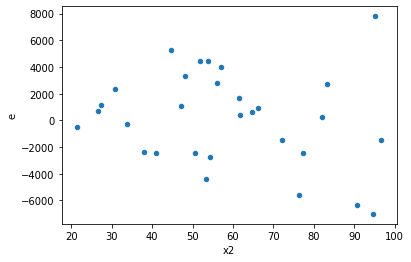

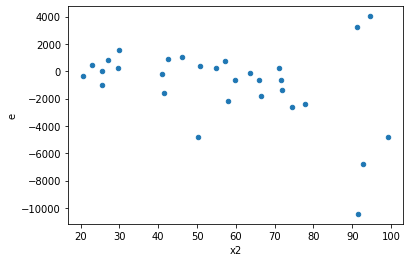

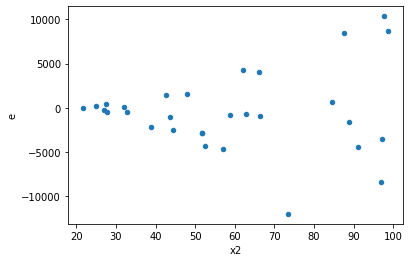

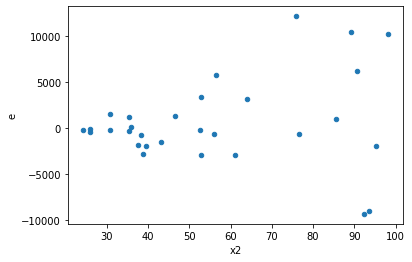

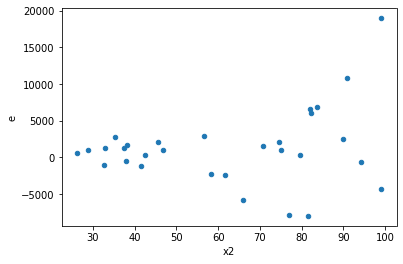

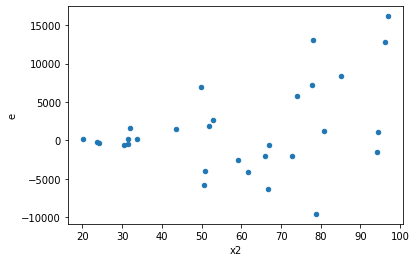

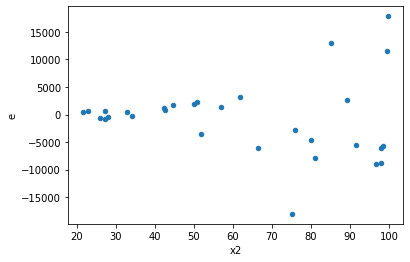

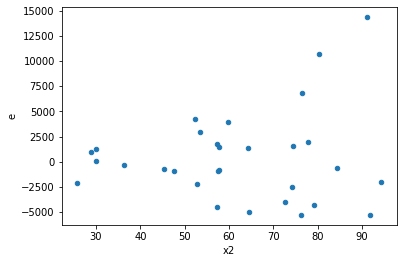

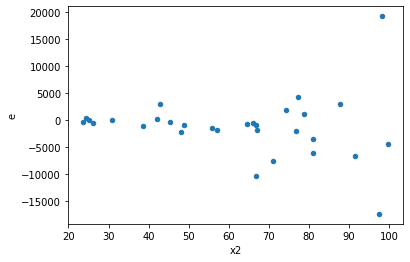

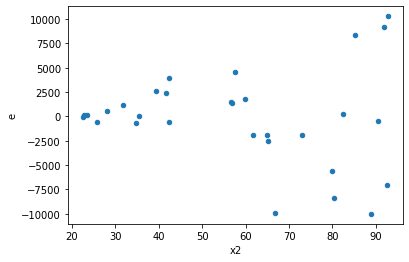

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,12.0,10.0,81483054.2852591,205872045.1355581,6790254.5237715915,20587204.51355581,3.0318752325827125,0.08847092686573732,0.9557645365671313,0.04423546343286866,Reject001=1 : Homoscedasticity
4.0,9.0,13.0,11456391.223753393,553100248.4102892,1272932.3581948215,42546172.95463763,33.42375003725529,3.018222882733568e-07,0.9999998490888559,1.509111441366784e-07,Reject001=0 : Heteroscedasticity
5.0,10.0,12.0,37704995.073585995,685888559.2432971,3770499.5073585995,57157379.93694142,15.159100226744938,5.0491412290298854e-05,0.9999747542938549,2.5245706145149427e-05,Reject001=0 : Heteroscedasticity
6.0,7.0,15.0,24023989.81419997,990300387.3185863,3431998.54488571,66020025.82123909,19.236612416290416,3.9725410050373e-06,0.9999980137294975,1.98627050251865e-06,Reject001=0 : Heteroscedasticity
8.0,4.0,18.0,51362006.25032146,331082217.5053523,12840501.562580366,18393456.52807513,1.4324562353293984,0.5276210057423298,0.7361894971288351,0.2638105028711649,Reject001=1 : Homoscedasticity
12.0,14.0,8.0,384387621.5943601,236778770.09905544,27456258.685311437,29597346.26238193,1.0779817673489482,0.953008034584351,0.5234959827078245,0.4765040172921755,Reject001=1 : Homoscedasticity
13.0,10.0,12.0,39972001.71645981,230211330.7720167,3997200.1716459813,19184277.564334724,4.799428785282713,0.012745055698056396,0.9936274721509718,0.006372527849028198,Reject001=1 : Homoscedasticity
19.0,7.0,15.0,14638269.104068438,466061469.03033894,2091181.3005812054,31070764.602022596,14.85799657513533,2.0802343781989308e-05,0.999989598828109,1.0401171890994654e-05,Reject001=0 : Heteroscedasticity
20.0,16.0,6.0,68731916.52136329,360427792.00351846,4295744.7825852055,60071298.66725308,13.983907729057824,0.003724330840503276,0.9981378345797484,0.001862165420251638,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,10.0,81483054.2852591,205872045.1355581,6790254.5237715915,20587204.51355581,3.0318752325827125,0.08847092686573732,Reject001=1 : Homoscedasticity
1.0,9.0,13.0,151492887.60825402,10171949.1012483,16832543.06758378,782457.6231729462,0.04648481337795048,6.973700987073944e-05,Reject001=0 : Heteroscedasticity
2.0,12.0,10.0,287430778.6990134,117970775.65706658,23952564.891584452,11797077.56570666,0.49251834277887585,0.24508191765368026,Reject001=1 : Homoscedasticity
3.0,10.0,12.0,432725253.05879194,37369678.40752502,43272525.30587919,3114139.8672937513,0.07196575298716507,0.00022967585927509995,Reject001=0 : Heteroscedasticity
4.0,9.0,13.0,11456391.223753393,553100248.4102892,1272932.3581948215,42546172.95463763,33.42375003725529,3.018222882733568e-07,Reject001=0 : Heteroscedasticity
5.0,10.0,12.0,37704995.073585995,685888559.2432971,3770499.5073585995,57157379.93694142,15.159100226744938,5.0491412290298854e-05,Reject001=0 : Heteroscedasticity
6.0,7.0,15.0,24023989.81419997,990300387.3185863,3431998.54488571,66020025.82123909,19.236612416290416,3.9725410050373e-06,Reject001=0 : Heteroscedasticity
7.0,8.0,14.0,337808232.5797134,88662453.91452499,42226029.072464176,6333032.42246607,0.1499793506890724,0.011057486930610934,Reject001=1 : Homoscedasticity
8.0,4.0,18.0,51362006.25032146,331082217.5053523,12840501.562580366,18393456.52807513,1.4324562353293984,0.5276210057423298,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      704
Reject001=0 : Heteroscedasticity    296
Name: Result_test, dtype: int64